In [34]:
from langgraph.graph import StateGraph, END, START
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [35]:
load_dotenv()

True

In [36]:
llm = ChatOpenAI(model="gpt-4", temperature=0)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x11aeac770>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x11aeacd60>, root_client=<openai.OpenAI object at 0x11aeac640>, root_async_client=<openai.AsyncOpenAI object at 0x11aeac180>, model_name='gpt-4', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [37]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [38]:
blog = BlogState()

In [39]:
def create_outline(state:BlogState) -> BlogState:

    title = state['title']

    prompt = f'genrate details outline for an blog on topic "{title}"'

    outline = llm.invoke(prompt)

    state['outline'] = outline
    
    return state

In [40]:
def create_blog(state:BlogState) -> BlogState:
    
    title = state['title']
    outline = state['outline']

    prompt = f"write a detailed blog on the topic '{title}' with the following outline: {outline}"

    content = llm.invoke(prompt)

    state['content'] = content

    return state

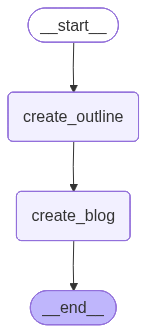

In [41]:
graph = StateGraph(BlogState)

#nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

#edges

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

graph.compile()

In [42]:
workflow = graph.compile()

In [45]:
initial_state = { 'title': 'The Future of AI in Everyday Life' }

final_state = workflow.invoke(initial_state)

print(final_state)


{'title': 'The Future of AI in Everyday Life', 'outline': AIMessage(content='I. Introduction\n    A. Brief overview of AI and its current role in everyday life\n    B. Purpose of the blog and what readers can expect to learn\n\nII. Understanding AI\n    A. Definition and explanation of AI\n    B. Brief history of AI development\n    C. Current applications of AI in everyday life\n\nIII. The Future of AI in Everyday Life\n    A. Predicted advancements in AI technology\n    B. Potential new applications of AI in everyday life\n        1. Home automation\n        2. Personalized education\n        3. Healthcare\n        4. Transportation\n        5. Entertainment\n    C. Discussion on how these advancements could change our daily routines\n\nIV. The Impact of AI on Society\n    A. Potential benefits of AI advancements\n    B. Possible challenges and ethical considerations\n    C. Discussion on how society might adapt to these changes\n\nV. Preparing for the Future of AI\n    A. Importance

In [47]:
print(final_state['content'])

content="I. Introduction\n\nArtificial Intelligence (AI) is no longer a concept confined to science fiction novels or high-tech laboratories. It has seamlessly integrated into our everyday lives, influencing how we work, communicate, and even entertain ourselves. This blog aims to delve into the future of AI in everyday life, providing readers with an understanding of AI, its potential advancements, and how it might reshape our daily routines and society at large.\n\nII. Understanding AI\n\nAI, or Artificial Intelligence, refers to the simulation of human intelligence processes by machines, especially computer systems. These processes include learning, reasoning, problem-solving, perception, and language understanding. The concept of AI was first introduced in the mid-20th century, and since then, it has evolved significantly. Today, AI is everywhere - from voice assistants like Siri and Alexa to recommendation algorithms on Netflix and Amazon.\n\nIII. The Future of AI in Everyday Life

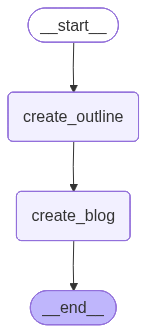

In [48]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())